In [1]:
import time
start_time=time.time()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import interpolate
import pickle
import json

import strucfunc
from strucfunc import sosflog
from bfunc import bfunc00,bfunc01,bfunc02,bfunc03s

In [3]:
reg = 'OrionLH'
line = 'OrionLH'

In [4]:
pickle_in = open('VFL//' + reg + '.pkl',"rb")
VF = pickle.load(pickle_in)
data = VF[line]

In [5]:
data.RV.var()

10.433847745911214

In [6]:
sig = data.RV.std()
sig2 = data.RV.var()

In [7]:
table = sosflog(data,-0.15,1)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
table

s                                                                  \
       count      mean           std       min       25%       50%       75%   
ils                                                                            
2      946.0  3.716349  1.333676e-01  3.556424  3.626319  3.683304  3.795286   
3    31368.0  2.849080  2.539766e-01  2.511944  2.634621  2.791722  3.017043   
4    60296.0  2.117635  2.085345e-01  1.787593  1.926730  2.109878  2.291638   
5    50754.0  1.516689  1.489556e-01  1.266862  1.390626  1.517768  1.656666   
6    32934.0  1.080703  1.027277e-01  0.907122  0.983427  1.079979  1.180348   
7    19762.0  0.768573  7.398400e-02  0.641383  0.715585  0.763392  0.843249   
8    10550.0  0.548854  4.926157e-02  0.477057  0.491737  0.533332  0.596317   
9     6220.0  0.386486  3.496424e-02  0.337064  0.357792  0.377121  0.429855   
10    3008.0  0.260781  1.138664e-02  0.238528  0.266382  0.266616  0.266663   
11    1242.0  0.168616  4.242823e-05  0.168527  0.168581  0.168627  0.168655   
12     648.0  0.119264  1.318179e-15  0.119264  0.119264  0.119264  0.119264   

                   dV2                                                     \
          max    count       mean        std   min    25%    50%      75%   
ils                                                                         
2    4.229287      3.0  24.753333  16.870140  7.29  16.65  26.01  33.4850   
3    3.545478   1371.0  41.610926  51.925685  0.00   5.76  22.09  59.2900   
4    2.507384  12469.0  31.395202  38.419756  0.00   4.00  16.81  44.8900   
5    1.772961  17153.0  22.816463  31.548788  0.00   2.56  10.89  31.3600   
6    1.245146  12866.0  18.209458  27.373514  0.00   1.69   7.29  23.0400   
7    0.868253   8294.0  14.846355  22.509136  0.00   1.21   5.76  18.4900   
8    0.608130   4549.0  11.365559  16.336624  0.00   1.21   4.84  14.4400   
9    0.430011   2731.0   9.709934  14.399664  0.00   1.00   4.00  12.2500   
10   0.266682   1312.0   8.452805  13.066364  0.00   0.64   3.24  10.8900   
11   0.168665    538.0   7.603625  13.834714  0.00   0.64   2.89   8.4100   
12   0.119264    272.0   5.030074   9.721514  0.00   0.36   1.69   5.4075   

             
        max  
ils          
2     40.96  
3    420.25  
4    282.24  
5    380.25  
6    316.84  
7    272.25  
8    174.24  
9    127.69  
10   114.49  
11   156.25  
12    77.44

In [9]:
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)

In [10]:
r0 = np.interp(sig2, b2, s,period = 360)
r0

0.45308379348756184

In [11]:
r1 = np.interp(sig, b2, s,period = 360)
r1

0.13545612962128972

In [12]:
r2 = np.interp(2*sig2, b2, s, period = 360)
r2

1.3321934316222648

In [13]:
#x = s
#y = b2 - sig2
#tck=interpolate.splrep(x,y,s=0)
#grid=np.linspace(x.min(),x.max(),num=len(x))
#ynew=interpolate.splev(grid,tck,der=0)
#inter=pd.DataFrame([grid,ynew]).T
#SFr=interpolate.sproot(tck)
#SFr

In [16]:
rgrid = np.logspace(-2, 1)

(10.433847745911214, 0.45308379348756184, 1.0, 0.8899715196780295)

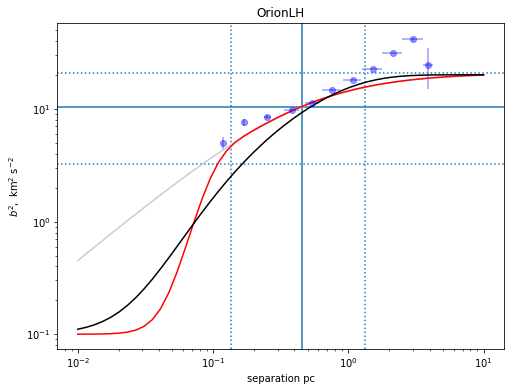

In [18]:
m = 0.15

fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")


ax.axhline(sig2, ls='-')
ax.axvline(r0, ls='-')

ax.axhline(2*sig2, ls=':')
ax.axvline(r2, ls=':')

ax.axhline(sig, ls=':')
ax.axvline(r1, ls=':')

ax.plot(rgrid, bfunc00(rgrid, r0, sig2, m), color="0.8")
ax.plot(rgrid, bfunc02(rgrid, r0, sig2, m, VF['s0'], 1/10), color="red")
ax.plot(rgrid, bfunc03s(rgrid, r0, sig2, m, VF['s0'],1/10), color="black")

ax.set(xscale='log', yscale='log', 
       xlabel='separation pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$',
       title=reg,
      )
None

sig2, r0, m, b2.mean()*0.05

In [ ]:
table

In [ ]:
Orion = { 'VF' : data,
        'SF' : table,
        's' : s,
        'b2' : b2,
        'sig2' : sig2,
        'pc' : VF['pc'],
        'r0' : r0,
        'r1' : r1,
        'r2' : r2,
        's0' : VF['s0'],
        'm' : m}

In [ ]:
f = open('Sfresults\\'+ line + '.pkl',"wb")
pickle.dump(Orion,f)
f.close()

class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

jsonfilename = f'SFresults//' + line +'.json'
with open(jsonfilename, "w") as f:
    json.dump(Car, fp=f, indent=3, cls=MyEncoder)
print(jsonfilename, end="")

In [ ]:
print("--- %s seconds ---" % (time.time()-start_time))